In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r"C:\Users\91942\Downloads\Data Science\EV_Dataset.csv"  
data = pd.read_csv(file_path)

In [3]:
data.shape

(96845, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [6]:
data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [7]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [8]:
# Data Cleaning and Preparation
# Convert the 'Date' column to datetime format for temporal analysis
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Verify data types and remove invalid rows (if any)
data = data.dropna(subset=['Date'])# Drop rows with invalid dates

# Aggregating EV Sales by Vehicle_Category and State
segmentation_data = data.groupby(['Vehicle_Category', 'State'])['EV_Sales_Quantity'].sum().reset_index()

# Sorting data for high-performing segments
segmentation_data_sorted = segmentation_data.sort_values(by='EV_Sales_Quantity', ascending=False)


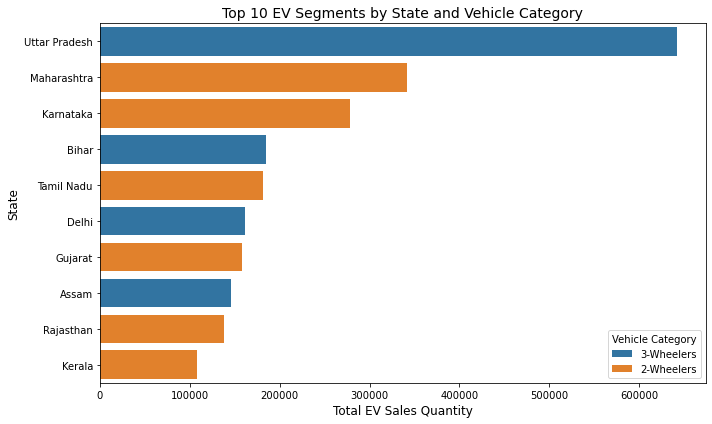

In [9]:
# Visualizing Top 10 Segments
top_10_segments = segmentation_data_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_segments, x='EV_Sales_Quantity', y='State', hue='Vehicle_Category', dodge=False)
plt.title('Top 10 EV Segments by State and Vehicle Category', fontsize=14)
plt.xlabel('Total EV Sales Quantity', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Vehicle Category')
plt.tight_layout()
plt.show()

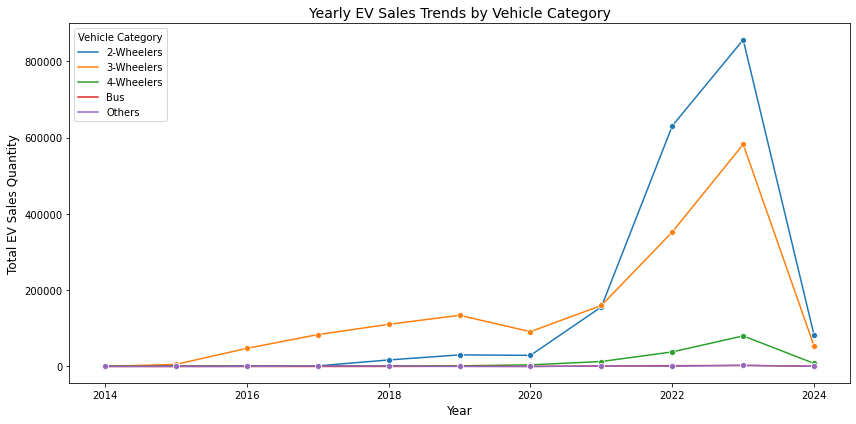

In [10]:
# Temporal Analysis: Yearly EV Sales Trends
yearly_sales = data.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
# Line plot for EV sales trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', marker='o')
plt.title('Yearly EV Sales Trends by Vehicle Category', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total EV Sales Quantity', fontsize=12)
plt.legend(title='Vehicle Category')
plt.tight_layout()
plt.show()

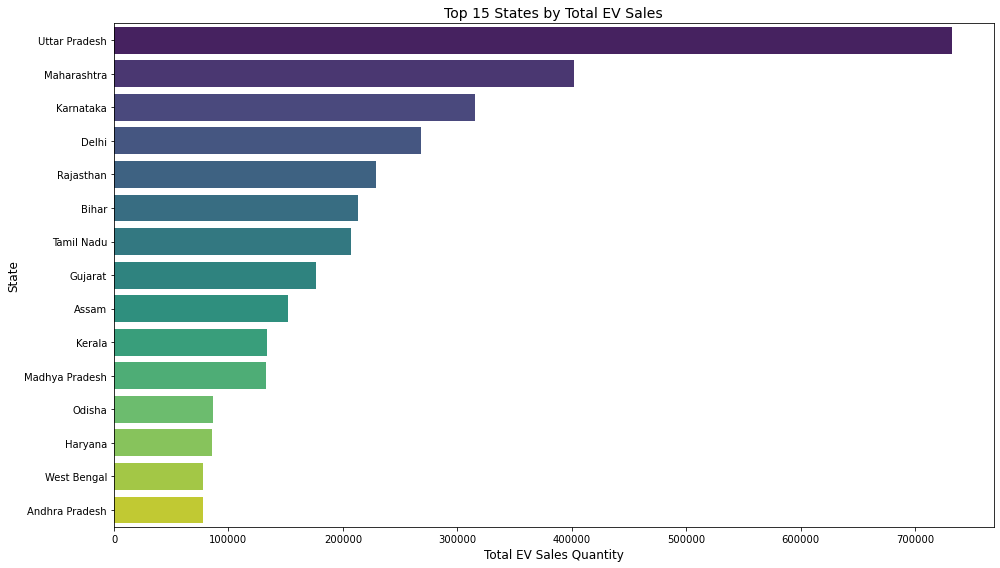

In [11]:
# Geographic Analysis: State-Wise Total EV Sales
state_sales = data.groupby('State')['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)
# Bar plot for state-wise sales
plt.figure(figsize=(14, 8))
sns.barplot(data=state_sales.head(15), y='State', x='EV_Sales_Quantity', palette='viridis')
plt.title('Top 15 States by Total EV Sales', fontsize=14)
plt.xlabel('Total EV Sales Quantity', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

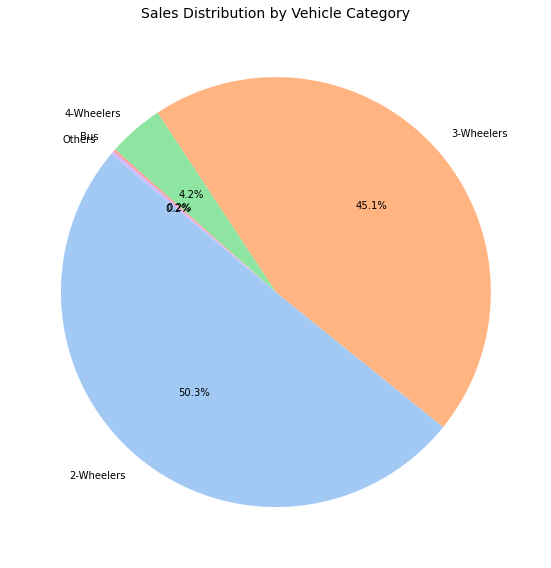

In [12]:
# Category-Wise Performance Analysis
category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
# Pie chart for category distribution
plt.figure(figsize=(8, 8))
plt.pie(category_sales['EV_Sales_Quantity'], labels=category_sales['Vehicle_Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Vehicle Category', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# Insights Summary
print("**Key Insights**")
print("- The highest EV sales are for 3-Wheelers in Uttar Pradesh, followed by 2-Wheelers in Maharashtra.")
print("- Yearly trends show steady growth in EV adoption across categories.")
print("- Top-performing states include Uttar Pradesh, Maharashtra, and Karnataka.")
print("- 2-Wheelers and 3-Wheelers dominate the sales volume across India.")

**Key Insights**
- The highest EV sales are for 3-Wheelers in Uttar Pradesh, followed by 2-Wheelers in Maharashtra.
- Yearly trends show steady growth in EV adoption across categories.
- Top-performing states include Uttar Pradesh, Maharashtra, and Karnataka.
- 2-Wheelers and 3-Wheelers dominate the sales volume across India.
